# Real World Scenerio to study cryptocurrency and importing the required Dataset from https://www.cryptodatadownload.com


In [1]:
import pandas as pd
import functools as ft
import seaborn as sns
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 

# Import a CSV file into a Pandas DataFrame 

In [2]:
#Importing data
dataFrame_ada = pd.read_csv('./Dataset/Binance_ADAUSDT_1h.csv')
dataFrame_bnb = pd.read_csv('./Dataset/Binance_BNBUSDT_1h.csv')
dataFrame_btc = pd.read_csv('./Dataset/Binance_BTCUSDT_1h.csv')
dataFrame_eth = pd.read_csv('./Dataset/Binance_ETHUSDT_1h.csv')
dataFrame_xrp = pd.read_csv('./Dataset/Binance_XRPUSDT_1h.csv')

# Fetch/Importing Data from API
# Empty List - Using Dictionary or Lists
# Regex to find all the States starting with M
# Make use of iterators for listing all the States in Data


In [3]:
# Fetch/Importing Data from API

import requests
import json
import re

#Empty List - Using Dictionary or Lists 
thislist = []


response = requests.get("https://api.covid19india.org/state_district_wise.json")

print('API Status Response: ', response)
#print("------------------------------------------------------------------------------")
#print('API Data Response: ', response.json())
response_data = json.loads(response.text)


txt = "The rain in Spain"
x = re.search("^The.*Spain$", txt)

#Make use of iterators for listing all the States in Data
print("--------------------------------List of States in Data---------------------------------------")
for i in response_data:
    print(i)
    
    #Regex to find all the States starting with M
    x = re.findall("^M", i)
    if x:
      thislist.append(i)
    #print("------------------------------------------------------------------------------")

API Status Response:  <Response [200]>
--------------------------------List of States in Data---------------------------------------
State Unassigned
Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Delhi
Dadra and Nagar Haveli and Daman and Diu
Goa
Gujarat
Himachal Pradesh
Haryana
Jharkhand
Jammu and Kashmir
Karnataka
Kerala
Ladakh
Lakshadweep
Maharashtra
Meghalaya
Manipur
Madhya Pradesh
Mizoram
Nagaland
Odisha
Punjab
Puducherry
Rajasthan
Sikkim
Telangana
Tamil Nadu
Tripura
Uttar Pradesh
Uttarakhand
West Bengal


In [4]:
#Print list filtered using regex to find the state name starting with M
print(thislist)

['Maharashtra', 'Meghalaya', 'Manipur', 'Madhya Pradesh', 'Mizoram']


In [5]:
ada_head = dataFrame_ada.head()
print("Cardano Data :: {}".format(ada_head))
print("------------------------------------------------------------------------------")
bnb_head = dataFrame_bnb.head()
print("BNB Data :: {}".format(bnb_head))
print("------------------------------------------------------------------------------")
btc_head = dataFrame_btc.head()
print("Bitcoin Data :: {}".format(btc_head))
print("------------------------------------------------------------------------------")
eth_head = dataFrame_eth.head()
print("Ethereum Data :: {}".format(eth_head))
print("------------------------------------------------------------------------------")
xrp_head = dataFrame_xrp.head()
print("Ripple Data :: {}".format(xrp_head))

Cardano Data ::                                                                                                                          https://www.CryptoDataDownload.com
unix          date                symbol   open       high       low        close      Volume ADA       Volume USDT                              tradecount
1660176000000 2022-08-11 00:00:00 ADA/USDT 0.53740000 0.54470000 0.53700000 0.54470000 6894009.50000000 3728764.58708000                               8040
1660172400000 2022-08-10 23:00:00 ADA/USDT 0.53520000 0.53750000 0.53490000 0.53740000 2351540.80000000 1261238.77354000                               2176
1660168800000 2022-08-10 22:00:00 ADA/USDT 0.53610000 0.53730000 0.53430000 0.53520000 3508178.60000000 1879794.96216000                               3675
1660165200000 2022-08-10 21:00:00 ADA/USDT 0.53470000 0.53660000 0.53150000 0.53610000 6149815.00000000 3285007.45185000                               5959
------------------------------------------------

# Define a custom function to create reusable code

In [6]:
#Define a custom function to create reusable code

def remove_columns(df):
    
    df.reset_index(inplace=True)

    df.drop(columns=['level_0', 'level_7', 'level_8', 'https://www.CryptoDataDownload.com'], axis=1,inplace=True)
    
    dict = {'level_1':'date',
        'level_2':'symbol',
        'level_3':'open',
        'level_4':'high',
        'level_5':'low',
        'level_6':'close'}
    df.rename(columns = dict, inplace = True)
    
    df.drop(df.index[0], inplace = True)

# Checking/Removing missing values or drop duplicates

In [7]:
#Checking/Removing missing values or drop duplicates
def data_check(df):
    
    print('If Dataframe has any null values :: {}' .format(df.isnull().values.any()))
    print('Number of duplicate values in Dataframe :: {}' .format(df.duplicated().sum()))
    if(df.duplicated().sum() > 0):
        df.drop_duplicates(inplace=True)
        print('Number of duplicate values after removing in Dataframe :: {}' .format(df.duplicated().sum()))

In [8]:
remove_columns(dataFrame_ada)
remove_columns(dataFrame_bnb)
remove_columns(dataFrame_btc)
remove_columns(dataFrame_eth)
remove_columns(dataFrame_xrp)

In [9]:
print('-----ADA Data Check-----')
data_check(dataFrame_ada)
print('-----BNB Data Check-----')
data_check(dataFrame_bnb)
print('-----BTC Data Check-----')
data_check(dataFrame_btc)
print('-----ETH Data Check-----')
data_check(dataFrame_eth)
print('-----XRP Data Check-----')
data_check(dataFrame_xrp)

-----ADA Data Check-----
If Dataframe has any null values :: False
Number of duplicate values in Dataframe :: 0
-----BNB Data Check-----
If Dataframe has any null values :: False
Number of duplicate values in Dataframe :: 0
-----BTC Data Check-----
If Dataframe has any null values :: False
Number of duplicate values in Dataframe :: 1
Number of duplicate values after removing in Dataframe :: 0
-----ETH Data Check-----
If Dataframe has any null values :: False
Number of duplicate values in Dataframe :: 0
-----XRP Data Check-----
If Dataframe has any null values :: False
Number of duplicate values in Dataframe :: 0


In [10]:
print("************* HEAD Data **************")
print("ADA Data :: {}".format(dataFrame_ada.head()))
print("------------------------------------------------------------------------------")
print("BNB Data :: {}".format(dataFrame_bnb.head()))
print("------------------------------------------------------------------------------")
print("BTC Data :: {}".format(dataFrame_btc.head()))
print("------------------------------------------------------------------------------")
print("ETH Data :: {}".format(dataFrame_eth.head()))
print("------------------------------------------------------------------------------")
print("XRP Data :: {}".format(dataFrame_xrp.head()))

************* HEAD Data **************
ADA Data ::                   date    symbol        open        high         low  \
1  2022-08-11 00:00:00  ADA/USDT  0.53740000  0.54470000  0.53700000   
2  2022-08-10 23:00:00  ADA/USDT  0.53520000  0.53750000  0.53490000   
3  2022-08-10 22:00:00  ADA/USDT  0.53610000  0.53730000  0.53430000   
4  2022-08-10 21:00:00  ADA/USDT  0.53470000  0.53660000  0.53150000   
5  2022-08-10 20:00:00  ADA/USDT  0.52920000  0.53530000  0.52920000   

        close  
1  0.54470000  
2  0.53740000  
3  0.53520000  
4  0.53610000  
5  0.53490000  
------------------------------------------------------------------------------
BNB Data ::                   date    symbol          open          high           low  \
1  2022-08-11 00:00:00  BNB/USDT  328.80000000  330.00000000  328.50000000   
2  2022-08-10 23:00:00  BNB/USDT  327.20000000  328.90000000  327.00000000   
3  2022-08-10 22:00:00  BNB/USDT  329.30000000  329.70000000  326.80000000   
4  2022-08-10 21:

In [11]:
print("************* INFO Data **************")
print("ADA Data ::")
dataFrame_ada.info()
print("------------------------------------------------------------------------------")
print("BNB Data ::")
dataFrame_bnb.info()
print("------------------------------------------------------------------------------")
print("BTC Data ::")
dataFrame_btc.info()
print("------------------------------------------------------------------------------")
print("ETH Data ::")
dataFrame_eth.info()
print("------------------------------------------------------------------------------")
print("XRP Data ::")
dataFrame_xrp.info()

************* INFO Data **************
ADA Data ::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 1 to 17720
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    17720 non-null  object
 1   symbol  17720 non-null  object
 2   open    17720 non-null  object
 3   high    17720 non-null  object
 4   low     17720 non-null  object
 5   close   17720 non-null  object
dtypes: object(6)
memory usage: 830.8+ KB
------------------------------------------------------------------------------
BNB Data ::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 1 to 17720
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    17720 non-null  object
 1   symbol  17720 non-null  object
 2   open    17720 non-null  object
 3   high    17720 non-null  object
 4   low     17720 non-null  object
 5   close   17720 non-null  object
dtypes: object(6)
memory

In [12]:
print("************* Tail Data **************")
print("------------------------------------------------------------------------------")
print("ADA Data :: {}".format(dataFrame_ada.tail()))

print("------------------------------------------------------------------------------")
print("BNB Data :: {}".format(dataFrame_bnb.tail()))

print("------------------------------------------------------------------------------")
print("BTC Data :: {}".format(dataFrame_btc.tail()))

print("------------------------------------------------------------------------------")
print("ETH Data :: {}".format(dataFrame_eth.tail()))

print("------------------------------------------------------------------------------")
print("XRP Data :: {}".format(dataFrame_xrp.tail()))

************* Tail Data **************
------------------------------------------------------------------------------
ADA Data ::                       date    symbol        open        high         low  \
17716  2020-08-02 03:00:00  ADA/USDT  0.14435000  0.14826000  0.14418000   
17717  2020-08-02 02:00:00  ADA/USDT  0.14372000  0.14490000  0.14334000   
17718  2020-08-02 01:00:00  ADA/USDT  0.14495000  0.14503000  0.14312000   
17719  2020-08-02 00:00:00  ADA/USDT  0.14415000  0.14527000  0.14313000   
17720  2020-08-01 23:00:00  ADA/USDT  0.14482000  0.14678000  0.14404000   

            close  
17716  0.14759000  
17717  0.14432000  
17718  0.14372000  
17719  0.14495000  
17720  0.14410000  
------------------------------------------------------------------------------
BNB Data ::                       date    symbol         open         high          low  \
17716  2020-08-02 03:00:00  BNB/USDT  21.84860000  22.18320000  21.68510000   
17717  2020-08-02 02:00:00  BNB/USDT  21.950

# NumPy - slicing

In [13]:
#NumPy - slicing

def get_OHLC(df):
    df['date']= pd.to_datetime(df['date'], errors='coerce')
    df[['open','high','low','close']]=df[['open','high','low','close']].astype(float)
    name =[x for x in globals() if globals()[x] is df][0]
    df['OHLC'+name[9:]] = (df[['open','high', 'low', 'close']]).mean(axis=1)
    df.drop(columns=['symbol', 'open', 'high', 'low', 'close'], axis=1,inplace=True)

In [14]:
get_OHLC(dataFrame_ada)
get_OHLC(dataFrame_bnb)
get_OHLC(dataFrame_btc)
get_OHLC(dataFrame_eth)
get_OHLC(dataFrame_xrp)

In [15]:
print("************* HEAD Data **************")
print("ADA Data :: {}".format(dataFrame_ada.head()))
print("------------------------------------------------------------------------------")
print("BNB Data :: {}".format(dataFrame_bnb.head()))
print("------------------------------------------------------------------------------")
print("BTC Data :: {}".format(dataFrame_btc.head()))
print("------------------------------------------------------------------------------")
print("ETH Data :: {}".format(dataFrame_eth.head()))
print("------------------------------------------------------------------------------")
print("XRP Data :: {}".format(dataFrame_xrp.head()))

************* HEAD Data **************
ADA Data ::                  date  OHLC_ada
1 2022-08-11 00:00:00  0.540950
2 2022-08-10 23:00:00  0.536250
3 2022-08-10 22:00:00  0.535725
4 2022-08-10 21:00:00  0.534725
5 2022-08-10 20:00:00  0.532150
------------------------------------------------------------------------------
BNB Data ::                  date  OHLC_bnb
1 2022-08-11 00:00:00   329.300
2 2022-08-10 23:00:00   327.975
3 2022-08-10 22:00:00   328.275
4 2022-08-10 21:00:00   328.375
5 2022-08-10 20:00:00   327.200
------------------------------------------------------------------------------
BTC Data ::                  date    OHLC_btc
1 2022-08-15 00:00:00  24261.8775
2 2022-08-14 23:00:00  24287.5775
3 2022-08-14 22:00:00  24285.0900
4 2022-08-14 21:00:00  24341.5300
5 2022-08-14 20:00:00  24299.9800
------------------------------------------------------------------------------
ETH Data ::                  date   OHLC_eth
1 2022-08-11 00:00:00  1857.1650
2 2022-08-10 23:00:00 

In [16]:
print("************* INFO Data **************")
print("ADA Data ::")
dataFrame_ada.info()
print("------------------------------------------------------------------------------")
print("BNB Data ::")
dataFrame_bnb.info()
print("------------------------------------------------------------------------------")
print("BTC Data ::")
dataFrame_btc.info()
print("------------------------------------------------------------------------------")
print("ETH Data ::")
dataFrame_eth.info()
print("------------------------------------------------------------------------------")
print("XRP Data ::")
dataFrame_xrp.info()

************* INFO Data **************
ADA Data ::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 1 to 17720
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      17720 non-null  datetime64[ns]
 1   OHLC_ada  17720 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 277.0 KB
------------------------------------------------------------------------------
BNB Data ::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 1 to 17720
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      17720 non-null  datetime64[ns]
 1   OHLC_bnb  17720 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 277.0 KB
------------------------------------------------------------------------------
BTC Data ::
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43752 entri

In [17]:
dataFrame_btc = dataFrame_btc.dropna(how='any',axis=0) 
dataFrame_eth = dataFrame_eth.dropna(how='any',axis=0) 

In [18]:
print("BTC Data ::")
dataFrame_btc.info()
print("------------------------------------------------------------------------------")
print("ETH Data ::")
dataFrame_eth.info()

BTC Data ::
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17816 entries, 1 to 17816
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      17816 non-null  datetime64[ns]
 1   OHLC_btc  17816 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 417.6 KB
------------------------------------------------------------------------------
ETH Data ::
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17720 entries, 1 to 17720
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      17720 non-null  datetime64[ns]
 1   OHLC_eth  17720 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 415.3 KB


# Merge DataFrames

In [19]:
#Merge DataFrames

dataFrames_combine = [dataFrame_ada, dataFrame_bnb, dataFrame_btc, dataFrame_eth, dataFrame_xrp]
df = ft.reduce(lambda left, right: pd.merge(left, right, on='date'), dataFrames_combine)

In [20]:
df.head()

,date,OHLC_ada,OHLC_bnb,OHLC_btc,OHLC_eth,OHLC_xrp
0,2022-08-11 00:00:00,0.540950,329.300,24002.8725,1857.1650,0.383300
1,2022-08-10 23:00:00,0.536250,327.975,23896.1400,1851.4000,0.380600
2,2022-08-10 22:00:00,0.535725,328.275,23907.6075,1856.4125,0.380100
3,2022-08-10 21:00:00,0.534725,328.375,23962.5025,1854.2650,0.379125
4,2022-08-10 20:00:00,0.532150,327.200,23773.6775,1830.6650,0.377300


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17720 entries, 0 to 17719
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      17720 non-null  datetime64[ns]
 1   OHLC_ada  17720 non-null  float64       
 2   OHLC_bnb  17720 non-null  float64       
 3   OHLC_btc  17720 non-null  float64       
 4   OHLC_eth  17720 non-null  float64       
 5   OHLC_xrp  17720 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 969.1 KB


In [22]:
sns.set(rc={'figure.figsize':(20,13)})

# Visualise using matplotlib

************* ADA Chart **************


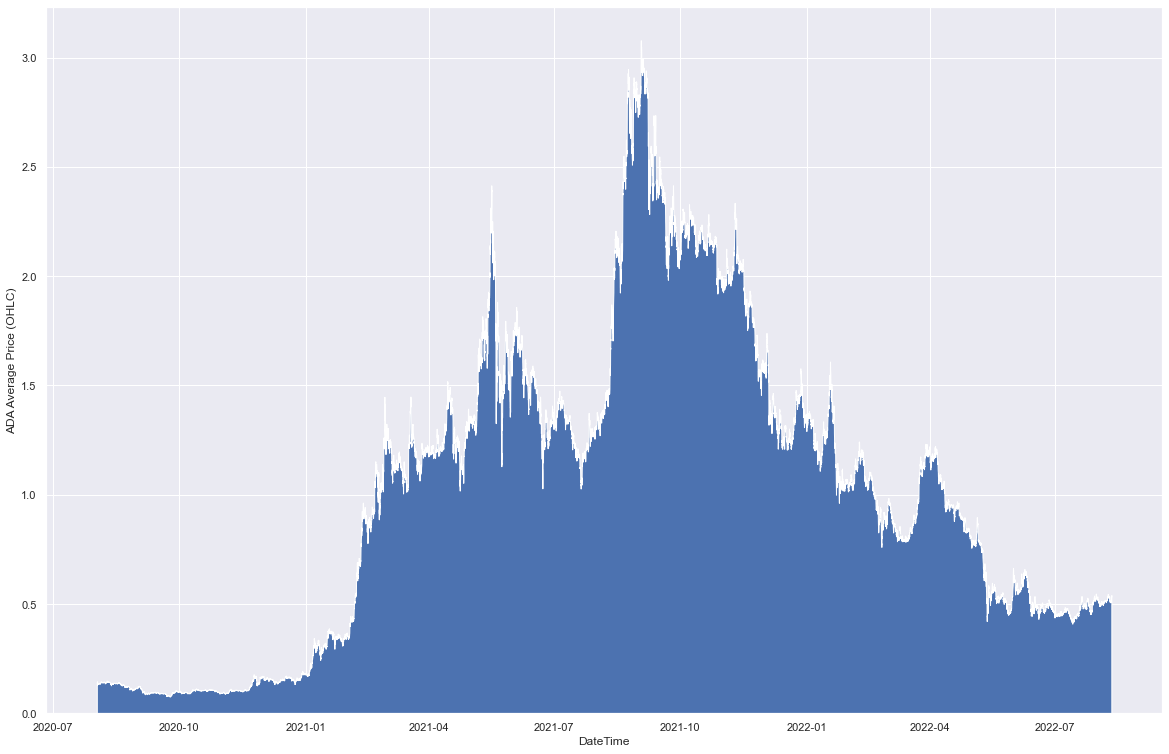

In [23]:
#Visualise
print("************* ADA Chart **************")
import matplotlib.pyplot as plt
sns.set_theme()
plt.stackplot( dataFrame_ada['date'], dataFrame_ada['OHLC_ada'], labels=['ADA'])
plt.xlabel("DateTime")
plt.ylabel("ADA Average Price (OHLC)")
plt.show()

************* BNB Chart **************


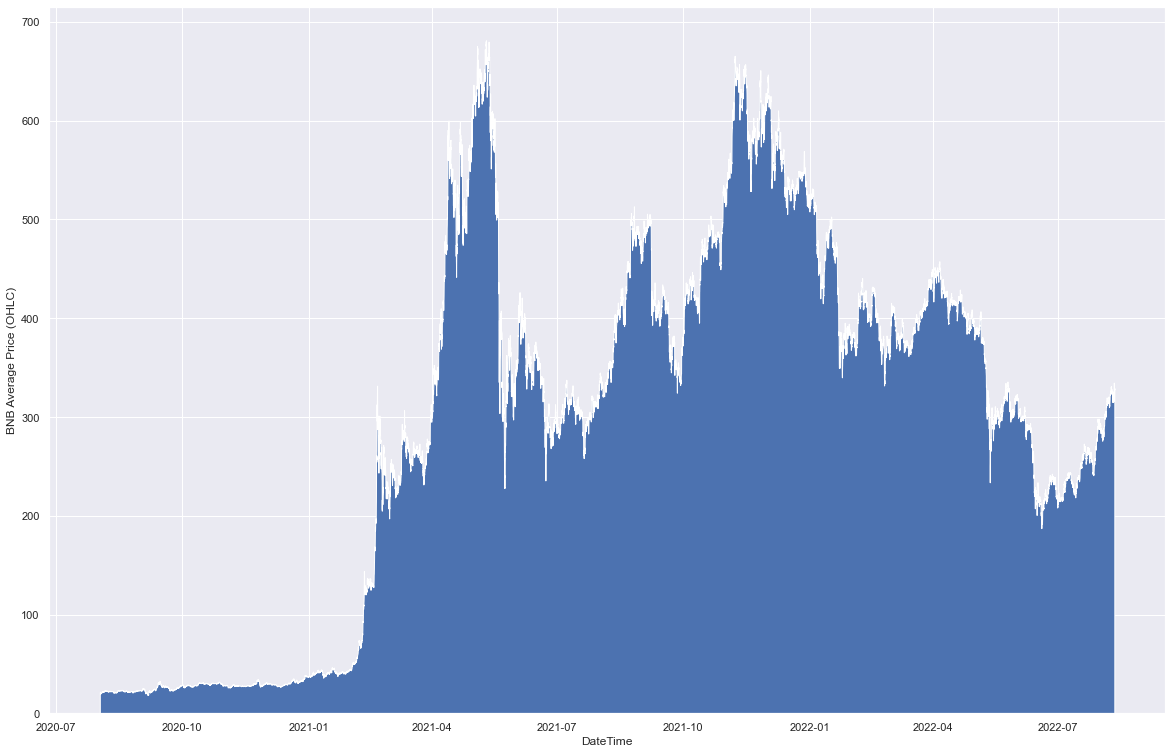

In [24]:
print("************* BNB Chart **************")
plt.stackplot(dataFrame_bnb['date'], dataFrame_bnb['OHLC_bnb'], labels=['BNB'])
plt.xlabel("DateTime")
plt.ylabel("BNB Average Price (OHLC)")
plt.show()

************* BTC Chart **************


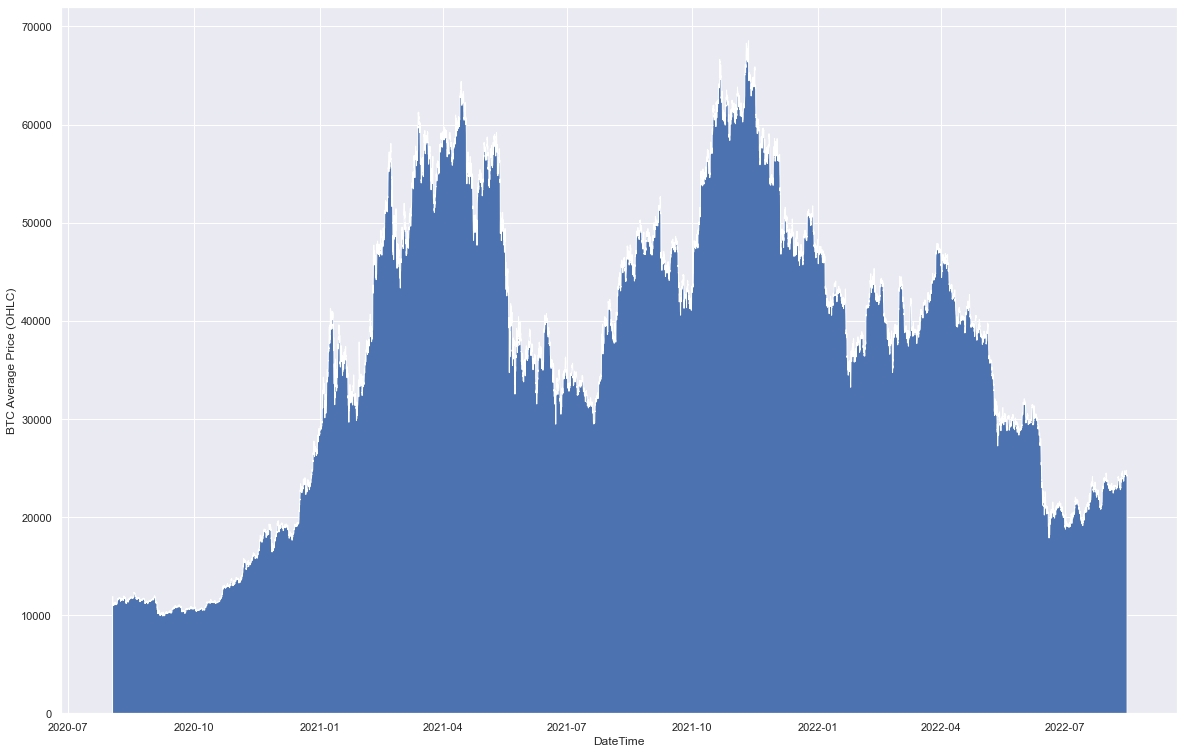

In [25]:
print("************* BTC Chart **************")
plt.stackplot(dataFrame_btc['date'], dataFrame_btc['OHLC_btc'], labels=['BTC'])
plt.xlabel("DateTime")
plt.ylabel("BTC Average Price (OHLC)")
plt.show()

************* ETH Chart **************


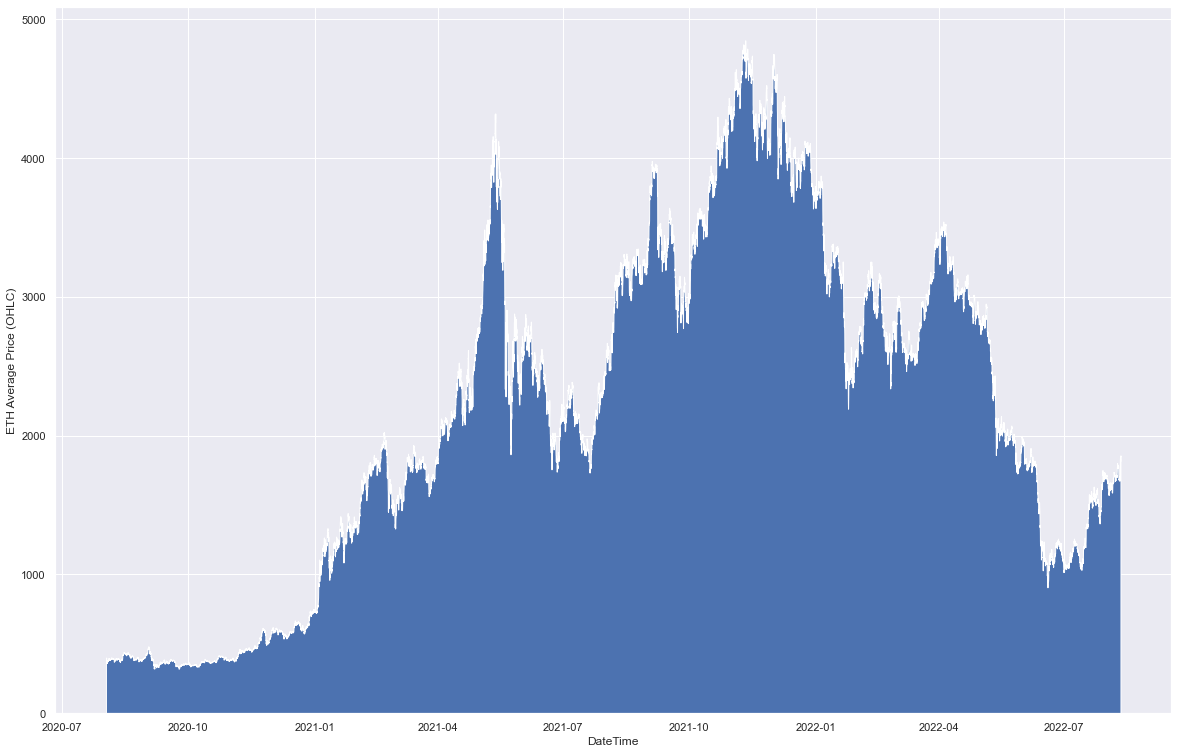

In [26]:
print("************* ETH Chart **************")
plt.stackplot(dataFrame_eth['date'], dataFrame_eth['OHLC_eth'], labels=['ETH'])
plt.xlabel("DateTime")
plt.ylabel("ETH Average Price (OHLC)")
plt.show()

************* XRP Chart **************


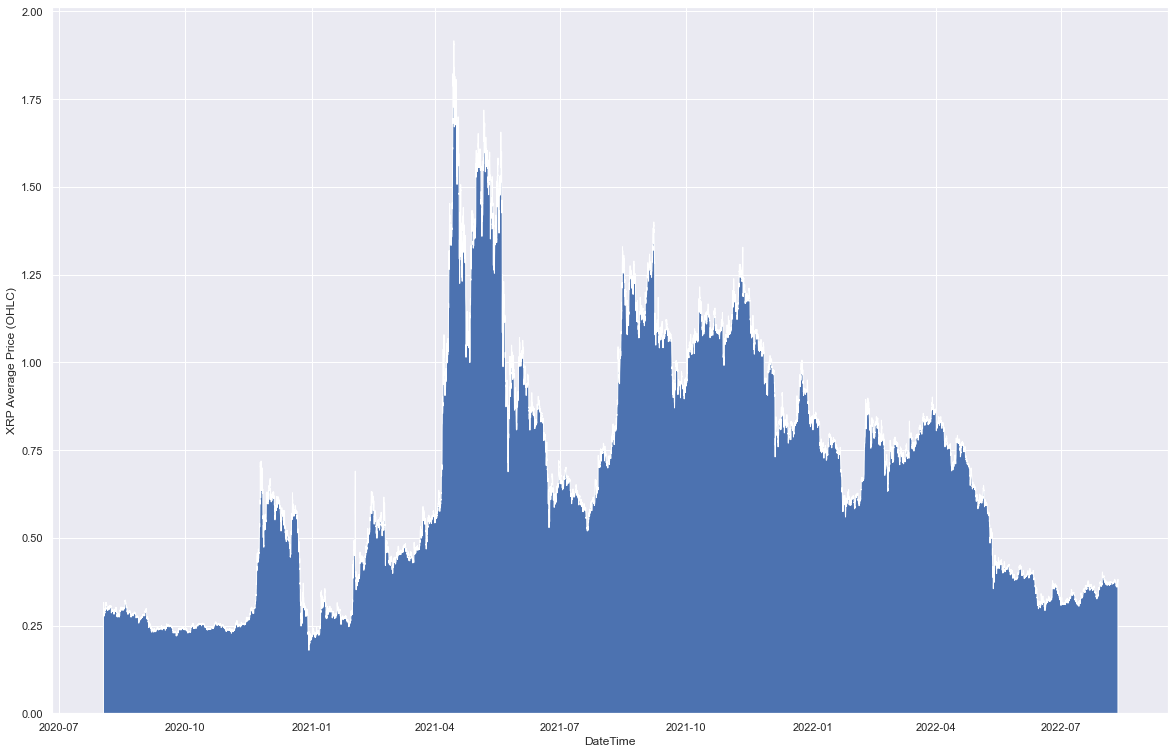

In [27]:
print("************* XRP Chart **************")
plt.stackplot(dataFrame_xrp['date'], dataFrame_xrp['OHLC_xrp'], labels=['ETH'])
plt.xlabel("DateTime")
plt.ylabel("XRP Average Price (OHLC)")
plt.show()

<AxesSubplot:xlabel='DateTime', ylabel='Average Price (OHCL)'>

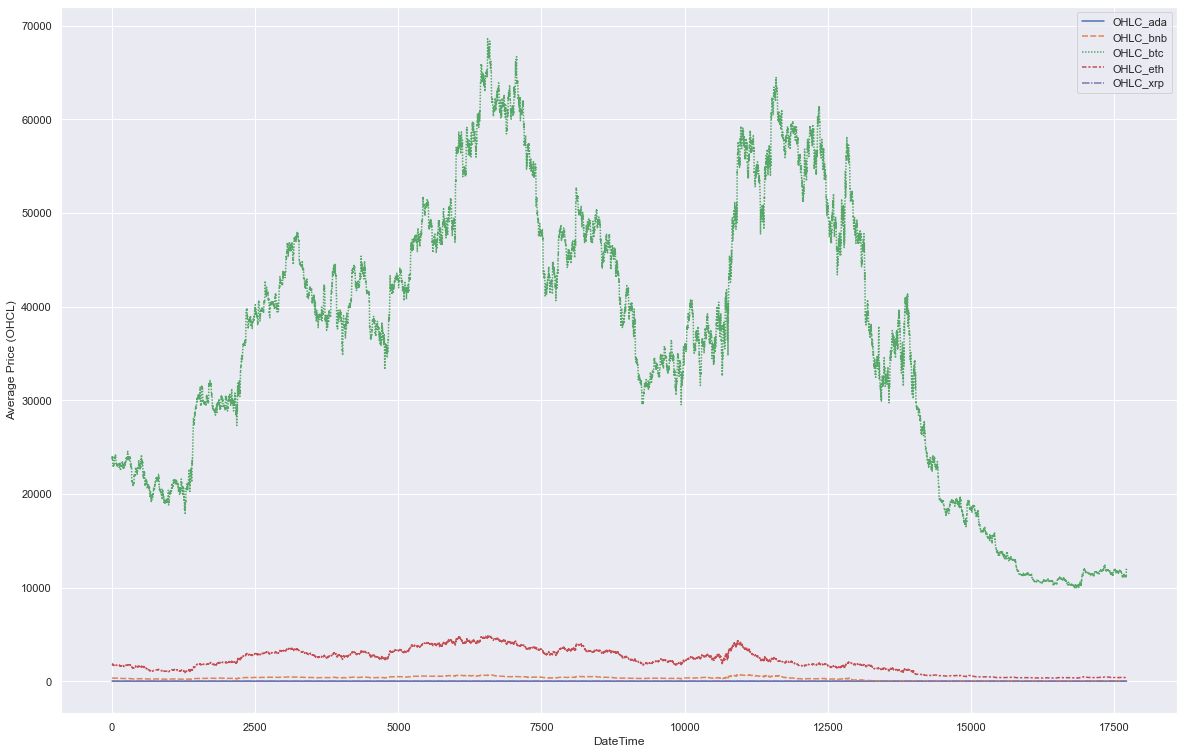

In [28]:
plt.xlabel("DateTime")
plt.ylabel("Average Price (OHCL)")
sns.lineplot(data = df)

<AxesSubplot:>

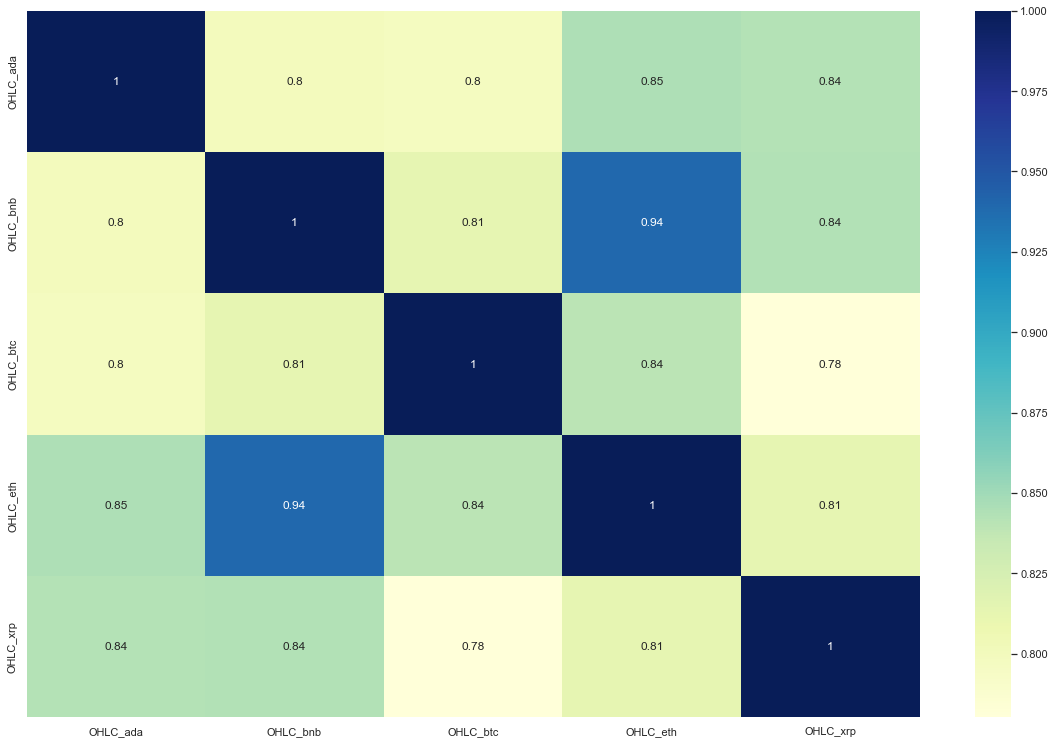

In [29]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Machine Learning - Supervised

In [30]:
X = df[['OHLC_ada','OHLC_bnb','OHLC_btc','OHLC_eth']]
y = df['OHLC_xrp']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train_reg, y_train_reg)

LinearRegression()

In [31]:
train_predict_reg = reg_all.predict(X_train_reg)
test_predict_reg = reg_all.predict(X_test_reg)

In [32]:
import math
print("Regression Metrics - Multiple Linear Regression Model")
print("-------------------------------------------------------------------------------------")
print("R^2 Train Data: {}".format(reg_all.score(X_train_reg, y_train_reg)))
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_reg,train_predict_reg)))
print("Train data MSE: ", mean_squared_error(y_train_reg,train_predict_reg))
print("Train data MAE: ", mean_absolute_error(y_train_reg,train_predict_reg))
print("-------------------------------------------------------------------------------------")
print("R^2 Test Data: {}".format(reg_all.score(X_test_reg, y_test_reg)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_reg,test_predict_reg)))
print("Test data MSE: ", mean_squared_error(y_test_reg,test_predict_reg))
print("Test data MAE: ", mean_absolute_error(y_test_reg,test_predict_reg))

Regression Metrics - Multiple Linear Regression Model
-------------------------------------------------------------------------------------
R^2 Train Data: 0.8029019704136469
Train data RMSE:  0.15341378997393745
Train data MSE:  0.023535790954167392
Train data MAE:  0.10979972103477147
-------------------------------------------------------------------------------------
R^2 Test Data: 0.7936598650551228
Test data RMSE:  0.15920613703629086
Test data MSE:  0.025346594070018224
Test data MAE:  0.11357372366014024


In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train_reg, y_train_reg);

train_predict_rf=rf.predict(X_train_reg)
test_predict_rf=rf.predict(X_test_reg)

print("Regression Metrics - Random Forest Regression Model")
print("-------------------------------------------------------------------------------------")
print("R^2 Train Data: {}".format(reg_all.score(X_train_reg, y_train_reg)))
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_reg,train_predict_rf)))
print("Train data MSE: ", mean_squared_error(y_train_reg,train_predict_rf))
print("Train data MAE: ", mean_absolute_error(y_train_reg,train_predict_rf))
print("-------------------------------------------------------------------------------------")
print("R^2 Test Data: {}".format(reg_all.score(X_test_reg, y_test_reg)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_reg,test_predict_rf)))
print("Test data MSE: ", mean_squared_error(y_test_reg,test_predict_rf))
print("Test data MAE: ", mean_absolute_error(y_test_reg,test_predict_rf))

Regression Metrics - Random Forest Regression Model
-------------------------------------------------------------------------------------
R^2 Train Data: 0.8029019704136469
Train data RMSE:  0.007619603159219505
Train data MSE:  5.8058352303987855e-05
Train data MAE:  0.003114538660512747
-------------------------------------------------------------------------------------
R^2 Test Data: 0.7936598650551228
Test data RMSE:  0.019238822345849758
Test data MSE:  0.00037013228525516797
Test data MAE:  0.00833114461813389


# Boosting - AdaBoost Regressor

In [34]:
from sklearn.ensemble import AdaBoostRegressor

ab_regr = AdaBoostRegressor(random_state=43, n_estimators=100)
ab_regr.fit(X_train_reg, y_train_reg)

AdaBoostRegressor(n_estimators=100, random_state=43)

In [35]:
train_predict_abr=ab_regr.predict(X_train_reg)
test_predict_abr=ab_regr.predict(X_test_reg)

print("Train data prediction:", train_predict_abr.shape)
print("Test data prediction:", test_predict_abr.shape)

Train data prediction: (12404,)
Test data prediction: (5316,)


In [36]:
print("Regression Metrics - AdaBoost Regressor")
print("-------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(y_train_reg,train_predict_abr))
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_reg,train_predict_abr)))
print("Train data MSE: ", mean_squared_error(y_train_reg,train_predict_abr))
print("Train data MAE: ", mean_absolute_error(y_train_reg,train_predict_abr))
print("-------------------------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test_reg,test_predict_abr))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_reg,test_predict_abr)))
print("Test data MSE: ", mean_squared_error(y_test_reg,test_predict_abr))
print("Test data MAE: ", mean_absolute_error(y_test_reg,test_predict_abr))
print("-------------------------------------------------------------------------------------")

Regression Metrics - AdaBoost Regressor
-------------------------------------------------------------------------------------
Train data R2 score: 0.8795675853595181
Train data RMSE:  0.11992092083309258
Train data MSE:  0.014381027253456857
Train data MAE:  0.1049030474587174
-------------------------------------------------------------------------------------
Test data R2 score: 0.8828198950263948
Test data RMSE:  0.11997614160206813
Test data MSE:  0.014394274553719501
Test data MAE:  0.10484497191218466
-------------------------------------------------------------------------------------


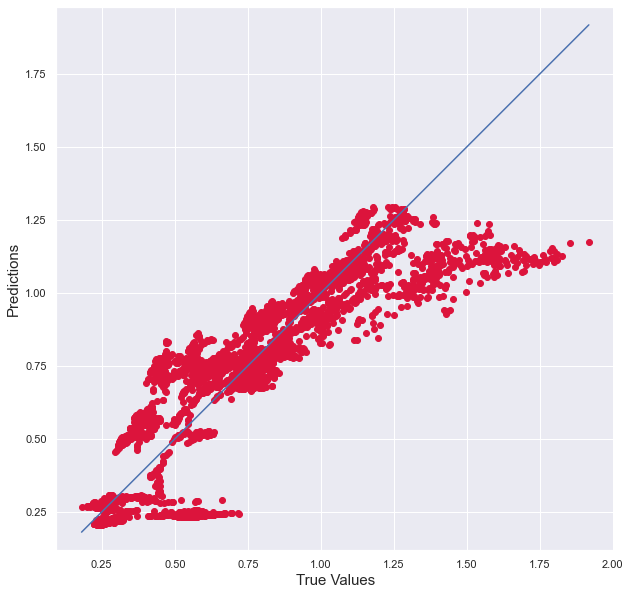

In [37]:
# Linear Regression

plt.figure(figsize=(10,10))
plt.scatter(y_test_reg,test_predict_reg, c='crimson')
p1 = max(max(test_predict_reg), max(y_test_reg))
p2 = min(min(test_predict_reg), min(y_test_reg))
plt.plot([p1, p2], [p1, p2], 'b-',alpha=1)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

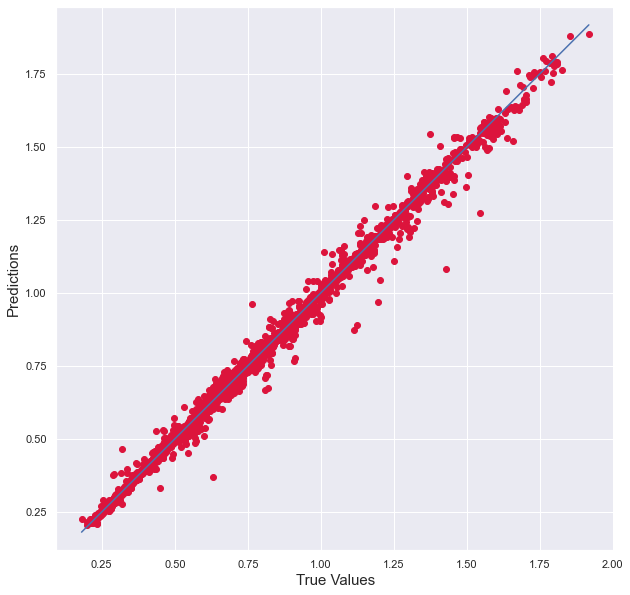

In [38]:
# Random Forest Regression

plt.figure(figsize=(10,10))
plt.scatter(y_test_reg,test_predict_rf, c='crimson')
p1 = max(max(test_predict_rf), max(y_test_reg))
p2 = min(min(test_predict_rf), min(y_test_reg))
plt.plot([p1, p2], [p1, p2], 'b-',alpha=1)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

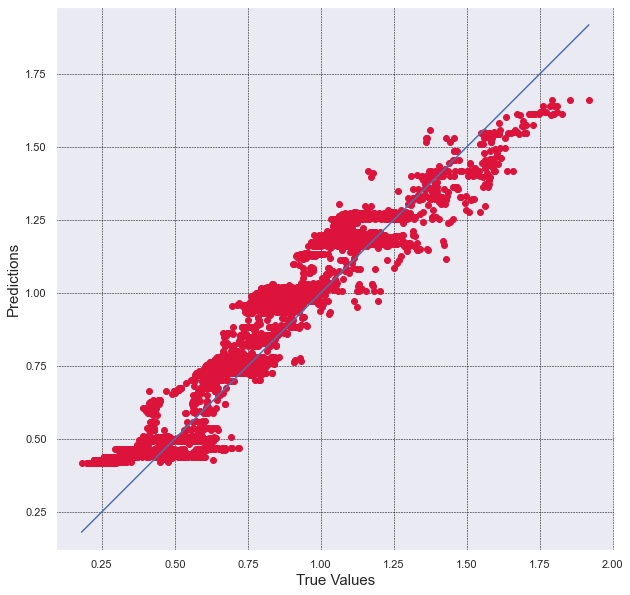

In [39]:
# AdaBoost Regressor

plt.figure(figsize=(10,10))
plt.scatter(y_test_reg,test_predict_abr, c='crimson')

y_test_reg,test_predict_reg
p1 = max(max(test_predict_abr), max(y_test_reg))
p2 = min(min(test_predict_abr), min(y_test_reg))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()